In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv('clean_ohe.csv')

In [6]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'waterfront_clean', 'view_clean',
       'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_9

In [7]:
df.corr()['price'].sort_values(ascending=False)

price               1.000000
sqft_living         0.701917
grade               0.667951
sqft_above          0.605368
sqft_living15       0.585241
bathrooms           0.525906
view_clean          0.393497
sqft_basement       0.321108
bedrooms            0.308787
lat                 0.306692
zipcode_98004       0.271184
waterfront_clean    0.264306
floors              0.256804
zipcode_98039       0.212561
zipcode_98040       0.204952
zipcode_98112       0.169957
zipcode_98006       0.133677
zipcode_98033       0.102551
yr_renovated        0.097541
zipcode_98105       0.091003
sqft_lot            0.089876
zipcode_98075       0.088634
zipcode_98199       0.083688
sqft_lot15          0.082845
zipcode_98119       0.078077
zipcode_98102       0.068037
zipcode_98109       0.065875
zipcode_98005       0.065075
zipcode_98074       0.057136
yr_built            0.053953
                      ...   
zipcode_98028      -0.024406
zipcode_98125      -0.026613
zipcode_98045      -0.027633
zipcode_98019 

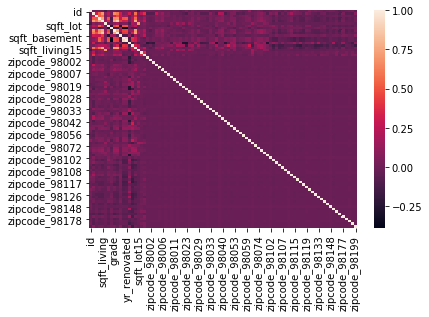

In [8]:
correlations = df.corr()
sns.heatmap(correlations)

In [9]:
df_nozip = df.loc[: , 'price':'view_clean']

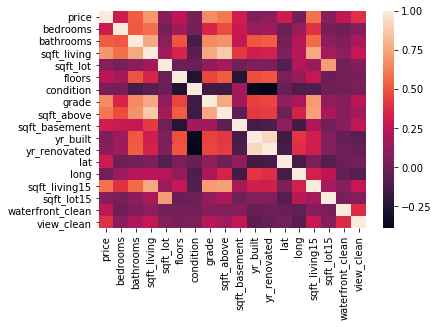

In [10]:
sns.heatmap(df_nozip.corr())

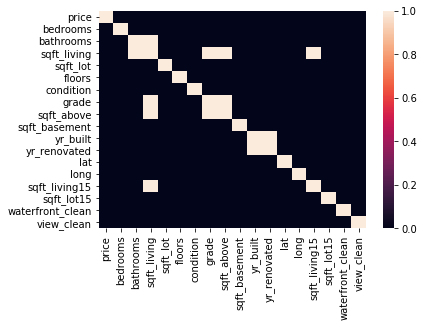

In [11]:
sns.heatmap(df_nozip.corr() > .75)

highly correlated: sqft living & sqft_living15, sqft_above, grade, bathrooms
                    
                    
                      sqft above & grade
                      
                      
                      
                    yr_built and yr rennovated

In [12]:
#removing bedrooms = 33
df.loc[df['bedrooms'] > 20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,5,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
df.drop(index=15856, inplace=True) #idk how to do this more elegantly
df.loc[df['bedrooms'] > 20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199


In [14]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'waterfront_clean', 'view_clean',
       'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_9

In [15]:
# df.to_csv('clean_ohe2.csv')

In [50]:
df['latxlong'] = df['lat']*df['long']
df['log_sqft_living'] = np.log(df['sqft_living'])

In [58]:
df['log_price'] = np.log(df['price'])

In [56]:
x = df[['latxlong', 'log_sqft_living', 'bedrooms', 'view_clean',
       'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112',
       'zipcode_98118', 'zipcode_98119', 'zipcode_98125',
       'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198']]
predictors = sm.add_constant(x)
model = sm.OLS(log_price, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1883.
Date:                Wed, 21 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:05:53   Log-Likelihood:                 2989.6
No. Observations:               21596   AIC:                            -5857.
Df Residuals:                   21535   BIC:                            -5370.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -20.1828      1.451    -13.909      0.000     -23.027     -17.339
latxlong           -0.0048      0.000    -19.409      0.000      -0.005      -0.004
log_sqft_living     0.7361      0.005    149.871      0.000       0.726       0.746
bedrooms           -0.0359      0.002    -17.024      0.000      -0.040      -0.032
view_clean          0.1070      0.002     52.814      0.000       0.103       0.111
zipcode_98001      -0.5950      0.015    -39.653      0.000      -0.624      -0.566
zipcode_98002      -0.6168      0.019    -33.339      0.000      -0.653      -0.581
zipcode_98003      -0.5807      0.016    -36.847      0.000      -0.612      -0.550
zipcode_98004       0.4675      0.012     38.019      0.000       0.443       0.492
zipcode_98010      -0.2449      0.024    -10.004      0.000      -0.293      -0.197
zipcode_98011      -0.3800      0.016    -24.148      0.000      -0.411      -0.349
zipcode_98014      -0.3572      0.020    -18.293      0.000      -0.396      -0.319
zipcode_98019      -0.4394      0.016    -28.157      0.000      -0.470      -0.409
zipcode_98022      -0.3915      0.021    -18.384      0.000      -0.433      -0.350
zipcode_98023      -0.6244      0.013    -47.771      0.000      -0.650      -0.599
zipcode_98024      -0.1408      0.025     -5.724      0.000      -0.189      -0.093
zipcode_98027      -0.0968      0.012     -7.903      0.000      -0.121      -0.073
zipcode_98028      -0.4310      0.013    -32.157      0.000      -0.457      -0.405
zipcode_98030      -0.5578      0.016    -34.653      0.000      -0.589      -0.526
zipcode_98031      -0.5473      0.015    -35.970      0.000      -0.577      -0.517
zipcode_98032      -0.6501      0.021    -31.561      0.000      -0.690      -0.610
zipcode_98034      -0.2696      0.010    -27.669      0.000      -0.289      -0.251
zipcode_98038      -0.3928      0.014    -28.151      0.000      -0.420      -0.365
zipcode_98039       0.7148      0.030     23.779      0.000       0.656       0.774
zipcode_98040       0.2771      0.013     21.006      0.000       0.251       0.303
zipcode_98042      -0.5005      0.014    -36.797      0.000      -0.527      -0.474
zipcode_98045      -0.2146      0.018    -11.907      0.000      -0.250      -0.179
zipcode_98052      -0.0877      0.009     -9.408      0.000      -0.106      -0.069
zipcode_98053      -0.1071      0.011     -9.673      0.000      -0.129      -0.085
zipcode_98055      -0.5335      0.015    -36.759      0.000      -0.562      -0.505
zipcode_98056      -0.3572      0.012    -30.260      0.000      -0.380      -0.334
zipcode_98058      -0.4542      0.012    -36.546      0.000      -0.479      -0.430
zipcode_98059      -0.2865      0.012    -24.720      0.000      -0.309      -0.264
zipcode_98065      -0.2305      0.015    -15.891      0.000

In [68]:
# remembering to split into train and test

from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns=['log_price', 'id', 'date', 'price']), 
                                                    df['log_price'], random_state=42)

In [84]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics


In [ ]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [77]:
lr = LinearRegression()
lr.fit(X_train_sc, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
lr.score(X_test_sc, Y_test)

0.8803667349057462

In [79]:
lr.coef_

array([-1.21239844e-02,  2.53832957e-02, -3.78421434e-02,  2.33737371e-02,
       -2.38993984e-02,  3.43179541e-02,  1.02765509e-01,  9.11365583e-02,
        8.22537337e-03, -4.98618333e-02,  3.46960047e-02, -2.97477148e+00,
        1.16944719e+00,  5.55029476e-02,  4.22478688e-03,  4.18698983e-02,
        4.90369042e-02, -4.33122307e-02, -3.28759930e-02, -3.86605456e-02,
        7.07384672e-02,  2.03131688e-02,  2.62775633e-02,  1.39762849e-02,
        2.03056744e-02, -3.24194028e-03, -1.17920421e-02, -7.86315324e-03,
       -1.40438786e-02, -1.82423918e-02, -6.26247787e-02,  4.22874278e-03,
        1.56255850e-02, -2.02613082e-02,  2.45158772e-02, -3.18097324e-02,
       -3.47538823e-02, -3.06662353e-02,  3.59413347e-02, -2.22733923e-03,
       -2.30341045e-02,  3.59272134e-02,  4.49497327e-02, -4.21936550e-02,
        5.98836135e-03,  2.10144800e-02,  1.51061177e-02, -3.07583740e-02,
       -1.54040503e-02, -3.29670476e-02, -1.05522826e-02,  6.87605471e-03,
       -1.08033490e-02, -

In [80]:
lr.intercept_

13.049431149788791

In [81]:
from sklearn.feature_selection import RFE

In [90]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=1)
select = select.fit(X = X_train_sc,
                    y = Y_train)



{'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__n_jobs': None,
 'estimator__normalize': False,
 'estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 'n_features_to_select': 1,
 'step': 1,
 'verbose': 0}

In [114]:
ranking = []
for rank in select.ranking_:
    ranking.append(rank)
ranking = pd.DataFrame(ranking, columns=['ranking'])

In [86]:
print("R2: " + str(metrics.r2_score(Y_test, lr.predict(X_test))))
print("abs err: " + str(metrics.mean_absolute_error(Y_test, lr.predict(X_test))))
print("mse: " + str(metrics.mean_squared_error(Y_test, lr.predict(X_test))))

R2: -1490362978.485609
abs err: 20250.549044347637
mse: 411146452.6644854


In [104]:
type(ranking)

pandas.core.frame.DataFrame

In [88]:
df_features = df.drop(columns=['log_price', 'id', 'date', 'price'])

In [113]:
features_cols = pd.DataFrame(df_features.columns, columns=['columns'], 
                             index=range(0,len(df_features.columns)))

In [120]:
feature_rankings = pd.concat([features_cols, ranking], axis=1)
feature_rankings.sort_values(by='ranking').tail(20)

,columns,ranking
44,zipcode_98045,70
31,zipcode_98024,71
80,zipcode_98166,72
63,zipcode_98108,73
52,zipcode_98070,74
48,zipcode_98056,75
8,sqft_basement,76
26,zipcode_98011,77
28,zipcode_98019,78
73,zipcode_98126,79


In [118]:
x = X_train_sc[]
predictors = sm.add_constant(x)
model = sm.OLS(Y_train_sc, predictors).fit()
model.summary()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices